# PyCity Schools Analysis

* As a whole, schools with higher budgets, did not yield better test results. By contrast, schools with higher spending per student actually (\$645-675) underperformed compared to schools with smaller budgets (<\$585 per student).

* As a whole, smaller and medium sized schools dramatically out-performed large sized schools on passing math performances (89-91% passing vs 67%).

* As a whole, charter schools out-performed the public district schools across all metrics. However, more analysis will be required to glean if the effect is due to school practices or the fact that charter schools tend to serve smaller student populations per school. 
---

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

## District Summary

* Calculate the total number of schools

* Calculate the total number of students

* Calculate the total budget

* Calculate the average math score 

* Calculate the average reading score

* Calculate the overall passing rate (overall average score), i.e. (avg. math score + avg. reading score)/2

* Calculate the percentage of students with a passing math score (70 or greater)

* Calculate the percentage of students with a passing reading score (70 or greater)

* Create a dataframe to hold the above results

* Optional: give the displayed data cleaner formatting

In [2]:
total_schools = len(school_data_complete["school_name"].unique())
total_students = len(school_data_complete["student_name"])
total_budget = school_data["budget"].sum()
avg_math = school_data_complete["math_score"].mean()
avg_read = school_data_complete["reading_score"].mean()
math_70_df = school_data_complete.loc[(school_data_complete["math_score"] >= 70)]
math_70 = (math_70_df["math_score"].count()/total_students)*100
read_70_df = school_data_complete.loc[(school_data_complete["reading_score"] >= 70)]
read_70 = (read_70_df["reading_score"].count()/total_students)*100
overall_rate = (avg_math + avg_read)/2

dist_summ = [{"Total Schools": total_schools, "Total Students": total_students, 
            "Total Budget": total_budget, "Average Math Score": avg_math, "Average Reading Score": avg_read,
             "% Passing Math": math_70, "% Passing Reading": read_70, "Overall Passing Rate": overall_rate}
]
dist_summ_df = pd.DataFrame(dist_summ)
# fixing the order of the columns
dist_summ_df = dist_summ_df[["Total Schools", "Total Students", "Total Budget", "Average Math Score",
                            "Average Reading Score", "% Passing Math",
                             "% Passing Reading", "Overall Passing Rate"]
]
dist_summ_df["Total Budget"] = dist_summ_df["Total Budget"].map("${:,.2f}".format)
dist_summ_df["Total Students"] = dist_summ_df["Total Students"].map("{:,}".format)
dist_summ_df


,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,80.431606


## School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)
  
* Create a dataframe to hold the above results

## Top Performing Schools (By Passing Rate)

* Sort and display the top five schools in overall passing rate

<Figure size 5400x360 with 0 Axes>

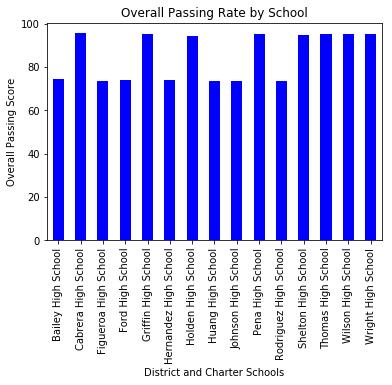

<Figure size 5400x360 with 0 Axes>

In [3]:
# created a dataframe with only pertinent data
reduced_sch_data = school_data_complete.loc[:,["school_name", "type", "size", "budget", "reading_score",
                                    "math_score"]]
# calculated the values for the index in the dataframe
tot_stud = reduced_sch_data.groupby("school_name")["size"].first()
tot_bud = reduced_sch_data.groupby("school_name")["budget"].first()
per_stud = tot_bud/ tot_stud
m_score = reduced_sch_data.groupby("school_name")["math_score"].mean()
r_score = reduced_sch_data.groupby("school_name")["reading_score"].mean()
m_70 = (math_70_df.groupby("school_name")["math_score"].count()/tot_stud)*100
r_70 = (read_70_df.groupby("school_name")["reading_score"].count()/tot_stud)*100
o_pass = (m_70 + r_70)/2

# stored data from groupby into a dataframe
sch_summ_df = pd.DataFrame({" ": reduced_sch_data.groupby("school_name")["school_name"].first(),
                            "School Type": reduced_sch_data.groupby("school_name")["type"].first(), 
                            "Total Students": tot_stud, "Total School Budget":tot_bud,
                            "Per Student Budget": per_stud,
                            "Average Math Score": m_score, "Average Reading Score": r_score,
                            "% Passing Math": m_70, "% Passing Reading":r_70,
                            "Overall Passing Rate": o_pass
})
# change the index
sch_summ_df.set_index(keys=" ", inplace=True)
# fomat the budget
sch_summ_df["Total School Budget"] = sch_summ_df["Total School Budget"].map("${:,.2f}".format)
#sch_summ_df["Total Students"] = sch_summ_df["Total Students"].map("{:,}".format)


sch_summ_plot = sch_summ_df["Overall Passing Rate"]
sch_summ_plot.plot(kind ="bar", color= "blue")
plt.title("Overall Passing Rate by School")
plt.xlabel("District and Charter Schools")
plt.ylabel("Overall Passing Score")
#plt.ylim(0, (max("Overall Passing Rate") + 10))
plt.figure(figsize=(75,5))

In [4]:
# display top 5 schools based on overall passing rate
sch_summ_df.sort_values("Overall Passing Rate", ascending =False).head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
,,,,,,,,,
Cabrera High School,Charter,1858,"$1,081,356.00",582.0,83.061895,83.975780,94.133477,97.039828,95.586652
Thomas High School,Charter,1635,"$1,043,130.00",638.0,83.418349,83.848930,93.272171,97.308869,95.290520
Pena High School,Charter,962,"$585,858.00",609.0,83.839917,84.044699,94.594595,95.945946,95.270270
Griffin High School,Charter,1468,"$917,500.00",625.0,83.351499,83.816757,93.392371,97.138965,95.265668
Wilson High School,Charter,2283,"$1,319,574.00",578.0,83.274201,83.989488,93.867718,96.539641,95.203679


## Bottom Performing Schools (By Passing Rate)

* Sort and display the five worst-performing schools

In [5]:
sch_summ_df.sort_values("Overall Passing Rate").head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
,,,,,,,,,
Rodriguez High School,District,3999,"$2,547,363.00",637.0,76.842711,80.744686,66.366592,80.220055,73.293323
Figueroa High School,District,2949,"$1,884,411.00",639.0,76.711767,81.158020,65.988471,80.739234,73.363852
Huang High School,District,2917,"$1,910,635.00",655.0,76.629414,81.182722,65.683922,81.316421,73.500171
Johnson High School,District,4761,"$3,094,650.00",650.0,77.072464,80.966394,66.057551,81.222432,73.639992
Ford High School,District,2739,"$1,763,916.00",644.0,77.102592,80.746258,68.309602,79.299014,73.804308


## Math Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [6]:
# group the data by grade and calculate average math score
m_9 = school_data_complete.loc[school_data_complete["grade"] == "9th"]
gm_9 = m_9.groupby("school_name")["math_score"].sum() / m_9.groupby("school_name")["Student ID"].count()

m_10 = school_data_complete.loc[school_data_complete["grade"] == "10th"]
gm_10 = m_10.groupby("school_name")["math_score"].sum() / m_10.groupby("school_name")["Student ID"].count()

m_11 = school_data_complete.loc[school_data_complete["grade"] == "11th"]
gm_11 = m_11.groupby("school_name")["math_score"].sum() / m_11.groupby("school_name")["Student ID"].count()

m_12 = school_data_complete.loc[school_data_complete["grade"] == "12th"]
gm_12 = m_12.groupby("school_name")["math_score"].sum() / m_12.groupby("school_name")["Student ID"].count()
#store in a Data Frame
math_df = pd.DataFrame({" ": reduced_sch_data.groupby("school_name")["school_name"].first(), 
                        "School Type ": reduced_sch_data.groupby("school_name")["type"].first(),
                        "9th Grade": gm_9, "10th Grade": gm_10, "11th Grade": gm_11, "12th Grade": gm_12})

#change the index
math_df.set_index(keys=" ", inplace=True)
# clean the formatting
math_df["9th Grade"] = math_df["9th Grade"].map("{:.2f}".format)
math_df["10th Grade"] = math_df["10th Grade"].map("{:.2f}".format)
math_df["11th Grade"] = math_df["11th Grade"].map("{:.2f}".format)
math_df["12th Grade"] = math_df["12th Grade"].map("{:.2f}".format)
math_df = math_df.sort_values("9th Grade", ascending = 0)
math_df

,School Type,9th Grade,10th Grade,11th Grade,12th Grade
,,,,,
Holden High School,Charter,83.79,83.43,85.00,82.86
Pena High School,Charter,83.63,83.37,84.33,84.12
Thomas High School,Charter,83.59,83.09,83.50,83.50
Shelton High School,Charter,83.42,82.92,83.38,83.78
Wright High School,Charter,83.26,84.01,83.84,83.64
Cabrera High School,Charter,83.09,83.15,82.77,83.28
Wilson High School,Charter,83.09,83.72,83.20,83.04
Griffin High School,Charter,82.04,84.23,83.84,83.36
Hernandez High School,District,77.44,77.34,77.14,77.19


## Reading Score by Grade 

* Perform the same operations as above for reading scores

In [7]:
# group the data by grade and calculate average reading score

gr_9 = m_9.groupby("school_name")["reading_score"].sum() / m_9.groupby("school_name")["Student ID"].count()

gr_10 = m_10.groupby("school_name")["reading_score"].sum() / m_10.groupby("school_name")["Student ID"].count()

gr_11 = m_11.groupby("school_name")["reading_score"].sum() / m_11.groupby("school_name")["Student ID"].count()

gr_12 = m_12.groupby("school_name")["reading_score"].sum() / m_12.groupby("school_name")["Student ID"].count()

#store in a Data Frame
read_df = pd.DataFrame({" ": reduced_sch_data.groupby("school_name")["school_name"].first(),
                        "School Type ": reduced_sch_data.groupby("school_name")["type"].first(),
                        "9th Grade": gr_9, "10th Grade": gr_10, "11th Grade": gr_11, "12th Grade": gr_12})

#change the index
read_df.set_index(keys=" ", inplace=True)
#clean the formatting
read_df["9th Grade"] = read_df["9th Grade"].map("{:.2f}".format)
read_df["10th Grade"] = read_df["10th Grade"].map("{:.2f}".format)
read_df["11th Grade"] = read_df["11th Grade"].map("{:.2f}".format)
read_df["12th Grade"] = read_df["12th Grade"].map("{:.2f}".format)
read_df = read_df.sort_values("12th Grade", ascending =0)
read_df


,School Type,9th Grade,10th Grade,11th Grade,12th Grade
,,,,,
Holden High School,Charter,83.68,83.32,83.82,84.70
Pena High School,Charter,83.81,83.61,84.34,84.59
Wilson High School,Charter,83.94,84.02,83.76,84.32
Cabrera High School,Charter,83.68,84.25,83.79,84.29
Wright High School,Charter,83.83,83.81,84.16,84.07
Griffin High School,Charter,83.37,83.71,84.29,84.01
Thomas High School,Charter,83.73,84.25,83.59,83.83
Shelton High School,Charter,84.12,83.44,84.37,82.78
Figueroa High School,District,81.20,81.41,80.64,81.38


## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [8]:
# Sample bins. Feel free to create your own bins.
spending_bins = [0, 585, 615, 645, 675]
group_names = ["<$585", "$585-615", "$615-645", "$645-675"]


In [9]:

sch_summ_df["Spending Ranges (Per Student)"] = pd.cut(sch_summ_df["Per Student Budget"], spending_bins, labels=group_names)
sch_spend = sch_summ_df.groupby("Spending Ranges (Per Student)")
sch_spend[["Average Math Score", "Average Reading Score", "% Passing Math", "% Passing Reading", "Overall Passing Rate"]].mean()



,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,95.035486
$585-615,83.599686,83.885211,94.230858,95.900287,95.065572
$615-645,79.079225,81.891436,75.668212,86.106569,80.887391
$645-675,76.997210,81.027843,66.164813,81.133951,73.649382


## Scores by School Size

* Perform the same operations as above, based on school size.

In [10]:
# Sample bins. Feel free to create your own bins.
size_bins = [0, 1000, 2000, 5000]
group_names = ["Small (< 1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [11]:
#sch_summ_df["School Size"] = pd.cut(sch_summ_df["Total Students"], size_bins, labels = group_names)
#sch_size = sch_summ_df.groupby("School Size")
#sch_size[["Average Math Score", "Average Reading Score", "% Passing Math", "% Passing Reading",  "Overall Passing Rate"]]
#sch_size
sch_summ_df["School Size"] = pd.cut(sch_summ_df["Total Students"], size_bins, labels = group_names)
sch_size = sch_summ_df.groupby("School Size")
sch_size[["Average Math Score", "Average Reading Score", "% Passing Math", "% Passing Reading", "Overall Passing Rate"]].mean()

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
School Size,,,,,
Small (< 1000),83.821598,83.929843,93.550225,96.099437,94.824831
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,95.195187
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,76.364998


## Scores by School Type

* Perform the same operations as above, based on school type.

In [12]:
sch_type = sch_summ_df.groupby("School Type")
sch_type[["Average Math Score", "Average Reading Score", "% Passing Math", "% Passing Reading", "Overall Passing Rate"]].mean()


,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,95.103660
District,76.956733,80.966636,66.548453,80.799062,73.673757


# School Analysis
# Looking at the data in the various tables leads me to question the level of math instruction in district schools.
# The average reading scores across grade levels (9th - 12th) is comparable between Charter and District schools. There is a 33.8% difference in the passing math scores between Charter and Districts and only a 17% difference in the passing reading scores between charter and district.
# Looking at the "Math Score by Grade Level" table it is evident that the average math scores across grade levels is significantly lower in District schools. 
# While budget and school size cannot be ruled out as facors contributing to the low overall passing scores these are not key factors becasue the reading scores at the same schools are not significantly impacted. 
# Other factors like math instructional methods and teacher availability should be looked into to determine what is leading to poor math scores at District schools.
